In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import glob
import sys
import pickle

import matplotlib.pyplot as plt

import itertools
import seaborn as sns

In [ ]:
with tarfile.open('/content/drive/MyDrive/women.tar') as tar:
  tar.extractall('/content/drive/MyDrive/women')

In [ ]:
with tarfile.open('/content/drive/MyDrive/women.tar') as tar:
  names = tar.getnames()

In [ ]:
txt_paths = glob.glob('/content/drive/MyDrive/labels/*.txt')
txt_paths

['/content/drive/MyDrive/labels/top_test_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_test_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_test_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_test_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_test_detect_all.txt',
 '/content/drive/MyDrive/labels/top_train_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_train_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_train_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_train_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_train_detect_all.txt']

In [ ]:
def sort_file_paths(files):
  sort = sorted(txt_paths)
  return sort

In [ ]:
txt_paths = sort_file_paths(txt_paths)
txt_paths

['/content/drive/MyDrive/labels/dress_test_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_train_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_test_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_train_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_test_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_train_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_test_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_train_detect_all.txt',
 '/content/drive/MyDrive/labels/top_test_detect_all.txt',
 '/content/drive/MyDrive/labels/top_train_detect_all.txt']

In [ ]:
with open(txt_paths[0],'r') as f:
  lines = f.readlines()
for x in lines:
  print(x.split('\t')[0])

  break

women/dresses/casual_and_day_dresses/56037632/56037632_0.jpeg


In [ ]:
def split_string(array):

  cat = []
  sub = []
  prod_no = []
  gender = []
  prod_name = []
  path = []

  for j,file in enumerate(array):
    
    lines= []
    
    
    with open(file,'r')as f:
      lines = f.readlines()
    
    for i,x in enumerate(lines):
      
      #category = '^([a-z]+[^\/])+'
      #sub_category = '[\/][a-z]+[^\/]+'
      #product = '([\/][0-9]+)'

      string = x.split(sep=('/'))
      gender.append(string[0])
      cat.append(string[1])
      sub.append(string[2])
      
      #print(string[3])
      prod_no.append(string[3])


      t = string[4].split('\t')[2]
      #print(t)
      prod_name.append(t[:-1])
      path.append(x.split('\t')[0])

  return cat,sub,prod_no,gender,prod_name,path

In [ ]:
cat,sub,prod_no,gender,prod_name,path = split_string(txt_paths)

In [ ]:
cat = pd.Series(cat)
sub = pd.Series(sub)
prod_no = pd.Series(prod_no)
gender = pd.Series(gender)
prod_name = pd.Series(prod_name)
path = pd.Series(path)

df = pd.concat([gender,cat,sub,prod_no,prod_name,path],axis=1)
df.rename(columns={0:'gender',1:'category',2:'sub-category',3:'product-number',4:'product-name',5:'path'},inplace=True)
df

,gender,category,sub-category,product-number,product-name,path
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
1,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
2,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
3,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
4,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
...,...,...,...,...,...,...
201833,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_0.jpeg
201834,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_1.jpeg
201835,women,tops,t-shirts,91438020,multicolor clay tee chalk,women/tops/t-shirts/91438020/91438020_0.jpeg
201836,women,tops,t-shirts,91438020,multicolor clay tee chalk,women/tops/t-shirts/91438020/91438020_1.jpeg


In [ ]:
# Load df into drive
with open('/content/drive/MyDrive/Pickle files/data_frame','ab') as f:
  pickle.dump(df,f)

In [ ]:
# Load df into RAM
with open('/content/drive/MyDrive/Pickle files/data_frame','rb') as f:
  df = pickle.load(f)

# Pulling Image paths for comparison 

In [ ]:
#level_1 = glob.glob('/content/drive/MyDrive/women/*')
level_2 = []
#for x in level_1:
#  level_2.append(glob.glob(x+'/*'))
#level2 = list(itertools.chain.from_iterable(level_2))

#level_3 = []
#for x in tqdm(level2):
#  level_3.append(glob.glob(x+'/*'))
#level3 = list(itertools.chain.from_iterable(level_3))

level_4 = []
for x in tqdm(level3):
  level_4.append(glob.glob(x+'/*.jpeg'))
images_paths = list(itertools.chain.from_iterable(level_4)) 

100%|██████████| 96788/96788 [1:08:49<00:00, 23.44it/s]  


In [ ]:
# saving image_paths in drive
with open('/content/drive/MyDrive/Pickle files/image_paths','ab') as f:
  pickle.dump(images_paths,f)

In [ ]:
tally_path = [x[23:] for x in images_paths]
tally_path[0]

'women/tops/long_sleeved_tops/89728708/89728708_1.jpeg'

In [ ]:
tally_path_product = [x[23:].split('/')[3] for x in images_paths]
tally_path_product[0]

'89728708'

In [ ]:
df['path'].nunique()
df['path'][0]

'women/dresses/casual_and_day_dresses/56037632/56037632_0.jpeg'

# Tallying images with labels to get the union 

In [ ]:
df[df['path'].isin(tally_path)]

,gender,category,sub-category,product-number,product-name,path
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
3,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
4,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
6,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
8,women,dresses,casual_and_day_dresses,62629380,multicolor henley t-shirt dress,women/dresses/casual_and_day_dresses/62629380/...
...,...,...,...,...,...,...
201831,women,tops,t-shirts,91437517,classic tee black,women/tops/t-shirts/91437517/91437517_2.jpeg
201832,women,tops,t-shirts,91437722,black red heart t-shirt,women/tops/t-shirts/91437722/91437722_0.jpeg
201833,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_0.jpeg
201834,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_1.jpeg


In [ ]:
interim = df[df['product-number'].isin(tally_path_product)]
interim

,gender,category,sub-category,product-number,product-name,path
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
1,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
2,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
3,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
4,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
...,...,...,...,...,...,...
201833,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_0.jpeg
201834,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_1.jpeg
201835,women,tops,t-shirts,91438020,multicolor clay tee chalk,women/tops/t-shirts/91438020/91438020_0.jpeg
201836,women,tops,t-shirts,91438020,multicolor clay tee chalk,women/tops/t-shirts/91438020/91438020_1.jpeg


In [ ]:
interim[interim['path'].isin(tally_path)]

,gender,category,sub-category,product-number,product-name,path
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
3,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
4,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
6,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
8,women,dresses,casual_and_day_dresses,62629380,multicolor henley t-shirt dress,women/dresses/casual_and_day_dresses/62629380/...
...,...,...,...,...,...,...
201831,women,tops,t-shirts,91437517,classic tee black,women/tops/t-shirts/91437517/91437517_2.jpeg
201832,women,tops,t-shirts,91437722,black red heart t-shirt,women/tops/t-shirts/91437722/91437722_0.jpeg
201833,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_0.jpeg
201834,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_1.jpeg


# Product level frame

In [ ]:
product_level_df = df[~df['product-number'].duplicated()]

In [ ]:
product_level_df

,gender,category,sub-category,product-number,product-name,path
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress,women/dresses/casual_and_day_dresses/56037632/...
8,women,dresses,casual_and_day_dresses,62629380,multicolor henley t-shirt dress,women/dresses/casual_and_day_dresses/62629380/...
11,women,dresses,casual_and_day_dresses,67938089,black stitch dress,women/dresses/casual_and_day_dresses/67938089/...
20,women,dresses,casual_and_day_dresses,67981504,blue signature slim short-sleeve shirtdress,women/dresses/casual_and_day_dresses/67981504/...
32,women,dresses,casual_and_day_dresses,70969922,multicolor draped floral-print dress,women/dresses/casual_and_day_dresses/70969922/...
...,...,...,...,...,...,...
201826,women,tops,t-shirts,91437497,black fight party t-shirt,women/tops/t-shirts/91437497/91437497_1.jpeg
201830,women,tops,t-shirts,91437517,classic tee black,women/tops/t-shirts/91437517/91437517_1.jpeg
201832,women,tops,t-shirts,91437722,black red heart t-shirt,women/tops/t-shirts/91437722/91437722_0.jpeg
201833,women,tops,t-shirts,91437753,white run shirt,women/tops/t-shirts/91437753/91437753_0.jpeg


In [ ]:
with open('/content/drive/MyDrive/Pickle files/Product_level_df','ab') as f:
  pickle.dump(product_level_df,f)

# Images not available for the above

In [ ]:
df[~df['product-number'].isin(tally_path_product)]

,gender,category,sub-category,product-number,product-name,path
121,women,dresses,casual_and_day_dresses,88213754,multicolor off shoulder dress navy,women/dresses/casual_and_day_dresses/88213754/...
206,women,dresses,casual_and_day_dresses,89134710,green candy off shoulder dress,women/dresses/casual_and_day_dresses/89134710/...
241,women,dresses,casual_and_day_dresses,89494677,beige jersey v-back dress,women/dresses/casual_and_day_dresses/89494677/...
272,women,dresses,casual_and_day_dresses,89809382,red fringe hem stripe tank dress,women/dresses/casual_and_day_dresses/89809382/...
314,women,dresses,casual_and_day_dresses,90428807,blue cutout shoulder sheath dress,women/dresses/casual_and_day_dresses/90428807/...
...,...,...,...,...,...,...
201666,women,tops,t-shirts,91426861,white vintage v-neck tee,women/tops/t-shirts/91426861/91426861_0.jpeg
201681,women,tops,t-shirts,91427611,white printed cotton t-shirt,women/tops/t-shirts/91427611/91427611_0.jpeg
201689,women,tops,t-shirts,91427887,gray le fit silk t-shirt,women/tops/t-shirts/91427887/91427887_0.jpeg
201720,women,tops,t-shirts,91429852,black fringed-hem jersey t-shirt,women/tops/t-shirts/91429852/91429852_0.jpeg


In [ ]:
df_final = df[df['path'].isin(tally_path)]

In [ ]:
with open('/content/drive/MyDrive/Pickle files/final_data_frame','ab') as f:
  pickle.dump(df_final,f)

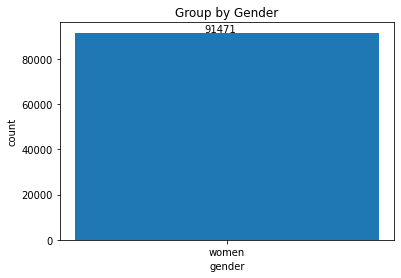

In [ ]:
# data_gender = df.groupby('gender').count()['category'].rename('count')
# plt.bar(data_gender.index,data_gender['women'],width=0.1)

# fig, ax = plt.subplots(1,2, figsize = (12,10))
# bar = ax[0].bar(data_gender.index,data_gender['women'])
# for x in bar:
#   ax[0].text((x.get_x()-0.06+x.get_width()/2),x.get_height()+100,s=x.get_height())
#plt.xlabel('gender')
#plt.ylabel('count')
#plt.title('Group by Gender',ha='center')
#plt.show()

data_gender1 = df_final.groupby('gender').count()['category'].rename('count')
#plt.bar(data_gender.index,data_gender['women'],width=0.1)

fig, ax = plt.subplots(1,1)
bar = ax.bar(data_gender1.index,data_gender1['women'])
for x in bar:
  ax.text((x.get_x()-0.06+x.get_width()/2),x.get_height()+100,s=x.get_height())
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Group by Gender')
plt.show()

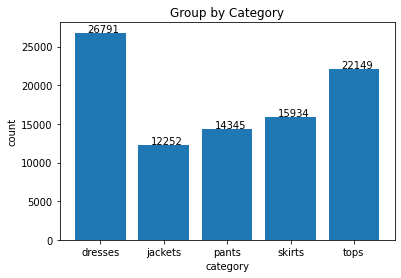

In [ ]:
# data_category = df.groupby('category').count()['gender'].rename('count')

# fig, ax = plt.subplots(1,1)
# bar = ax.bar(data_category.index,data_category.values)
# for x in bar:
#   ax.text((x.get_x()-0.2+x.get_width()/2),x.get_height()+100,s=x.get_height())

# plt.xlabel('category')
# plt.ylabel('count')
# plt.title('Group by Category')
# plt.show()

data_category1 = df_final.groupby('category').count()['gender'].rename('count')

fig, ax = plt.subplots(1,1)
bar = ax.bar(data_category1.index,data_category1.values)
for x in bar:
  ax.text((x.get_x()-0.2+x.get_width()/2),x.get_height()+100,s=x.get_height())

plt.xlabel('category')
plt.ylabel('count')
plt.title('Group by Category')
plt.show()

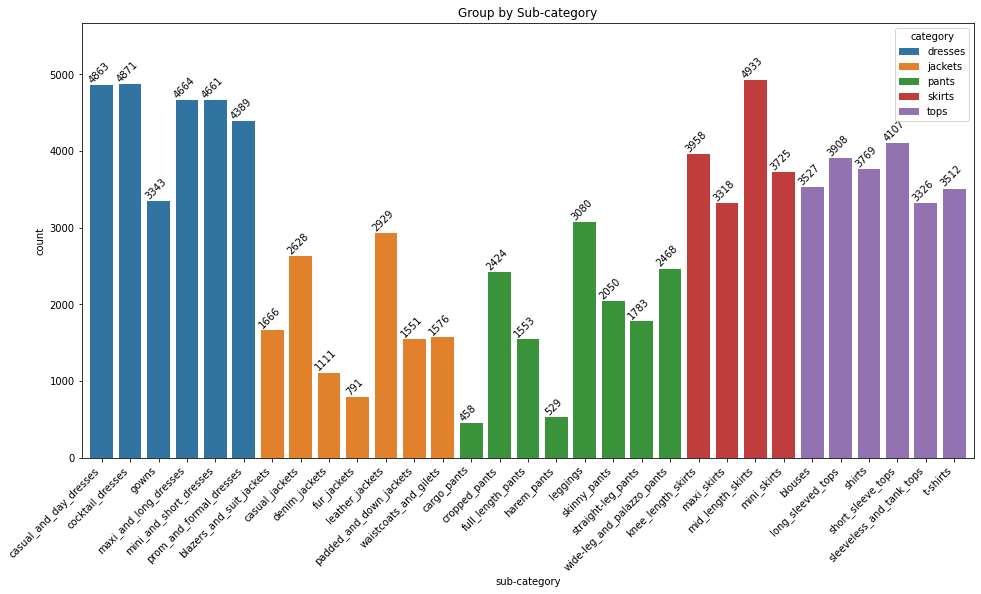

In [ ]:
# data_sub = df.groupby(['category','sub-category']).count()['gender'].rename('count').reset_index()
# #cmap = ['']
# #color = dict([(x,cmap(i)) for i,x in enumerate(data_sub['category'].unique())])

# fig, ax = plt.subplots(1,1,figsize=[16,8])
# g = sns.barplot(data=data_sub,x='sub-category',y='count',hue='category',dodge=False)
# plt.xlabel('sub-category')
# plt.xticks(rotation=45,ha='right')
# plt.ylabel('count')
# plt.title('Group by Sub-category')
# #bar = ax.bar(data_sub['sub-category'],data_sub['count'],color = data_sub['category'].apply(lambda x: color[x]))
# for p in g.patches:
#         g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
#                     ha='center', va='bottom',rotation=45,fontsize=10)
# plt.margins(x=0.01,y=0.15)
# plt.show()

# data_sub = df.groupby(['category','sub-category']).count()['gender'].rename('count').reset_index()
# #cmap = ['']
# #color = dict([(x,cmap(i)) for i,x in enumerate(data_sub['category'].unique())])

data_sub1 = df_final.groupby(['category','sub-category']).count()['gender'].rename('count').reset_index()
fig, ax = plt.subplots(1,1,figsize=[16,8])
g = sns.barplot(data=data_sub1,x='sub-category',y='count',hue='category',dodge=False)
plt.xlabel('sub-category')
plt.xticks(rotation=45,ha='right')
plt.ylabel('count')
plt.title('Group by Sub-category')
#bar = ax.bar(data_sub['sub-category'],data_sub['count'],color = data_sub['category'].apply(lambda x: color[x]))
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',rotation=45,fontsize=10)
plt.margins(x=0.01,y=0.15)
plt.show()


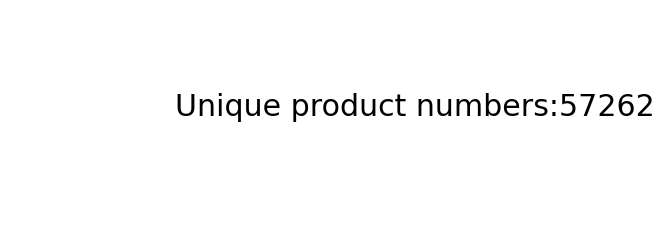

In [ ]:
plt.text(0.5,0.5,s=("Unique product numbers:"+str(df_final['product-number'].nunique())),fontdict={'fontsize':30})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

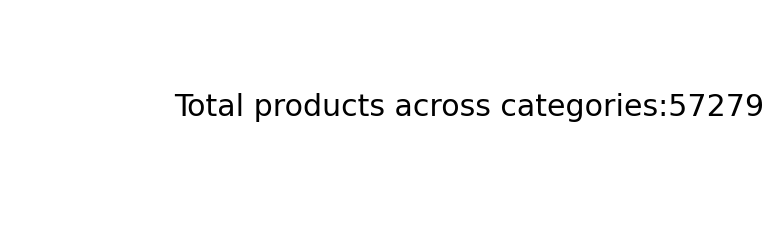

In [ ]:
plt.text(0.5,0.5,s=("Total products across categories:"+str(df_final.groupby(['category','sub-category','product-number']).count().shape[0]))\
         ,fontdict={'fontsize':30})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [ ]:
df_final.groupby('product-name').count()

,gender,category,sub-category,product-number,path
product-name,,,,,
,5,5,5,5,5
2 packable down jacket blue,1,1,1,1,1
3d double layered a-line skirt,3,3,3,3,3
7 all mankind ethereal blue contour mid-rise skinny leg,1,1,1,1,1
a line skirt,3,3,3,3,3
...,...,...,...,...,...
your leggings black damask,1,1,1,1,1
your leggings black plaid,1,1,1,1,1
zipped virgin wool skirt silk black,2,2,2,2,2


In [ ]:
#No product name
indices = df_final[df_final['product-name']==""].index
df_final.drop(index=indices,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
group = df_final.groupby(['category','sub-category','product-number']).count().reset_index()
result =group[group['product-number'].duplicated()] 

# No. of duplicate products present in different sub categories

In [ ]:
group[group['product-number'].isin(result['product-number'])].sort_values(by='product-number')
# plt.text(0,0.5,s=("Duplicates")\
#          ,fontdict={'fontsize':30})
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)

,category,sub-category,product-number,gender,product-name,path
8342,dresses,maxi_and_long_dresses,30890370,1,1,1
5878,dresses,gowns,30890370,2,2,2
50376,tops,short_sleeve_tops,61552469,1,1,1
55193,tops,t-shirts,61552469,2,2,2
22,dresses,casual_and_day_dresses,63862712,1,1,1
8379,dresses,maxi_and_long_dresses,63862712,1,1,1
5951,dresses,gowns,66115086,1,1,1
8385,dresses,maxi_and_long_dresses,66115086,1,1,1
5952,dresses,gowns,66115409,1,1,1
8386,dresses,maxi_and_long_dresses,66115409,1,1,1
